#### Project 2: Exploratory data analysis & model 
#### Kristie Kooken 

In [2]:
# loading libraries 

import numpy as np
import pandas as pd

from numpy import mean
from numpy import std

import statistics 
import string

import scipy.stats as stats

import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import graphviz

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score, recall_score , precision_score
from sklearn.metrics import average_precision_score, f1_score, classification_report, RocCurveDisplay
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 

from dtreeviz.trees import *

In [4]:
# Get the data.
# importing the sales price data

df1 = pd.read_csv('insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# missing value 

for c in df1: 
    miss = df1[c].isnull().sum()
    if miss >0: 
        missper = round((miss/1460), 3)*100
        print("{} has {}% missing values(s)".format(c,missper))
    else:
        print("{} has no missing values".format(c))

age has no missing values
sex has no missing values
bmi has no missing values
children has no missing values
smoker has no missing values
region has no missing values
charges has no missing values


In [6]:
# get rid of duplicates 
df1.drop_duplicates(inplace=True)

In [7]:
#see what type of data is held in each column
dataTypeSeries = df1.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64


In [8]:
# looking the descriptive stats of the numeric variables 
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#subset out only character columns
dfc = df1[['sex', 'children', 'smoker', 'region']]

In [10]:
# looking at the missing for these categorical variables 
for a in dfc: 
    print(dfc[a].value_counts(dropna=False))

sex
male      675
female    662
Name: count, dtype: int64
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [11]:
df1['Gender'] = df1['sex'].map({'male': 2, 'female': 1})

In [12]:
df1['Smoker'] = df1['smoker'].map({'yes': 1, 'no': 2})

In [13]:
df1['Region'] = df1['region'].map({'southeast': 4, 'southwest': 3, 'northeast':2, 'northwest':1 })

In [14]:
#subset out only character columns
dfc2 = df1[['Gender', 'Smoker', 'Region']]

In [15]:
for a in dfc2: 
    print(dfc2[a].value_counts(dropna=False))

Gender
2    675
1    662
Name: count, dtype: int64
Smoker
2    1063
1     274
Name: count, dtype: int64
Region
4    364
3    325
1    324
2    324
Name: count, dtype: int64


In [16]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges,Gender,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,2,2,4
2,28,male,33.000,3,no,southeast,4449.46200,2,2,4
3,33,male,22.705,0,no,northwest,21984.47061,2,2,1
4,32,male,28.880,0,no,northwest,3866.85520,2,2,1


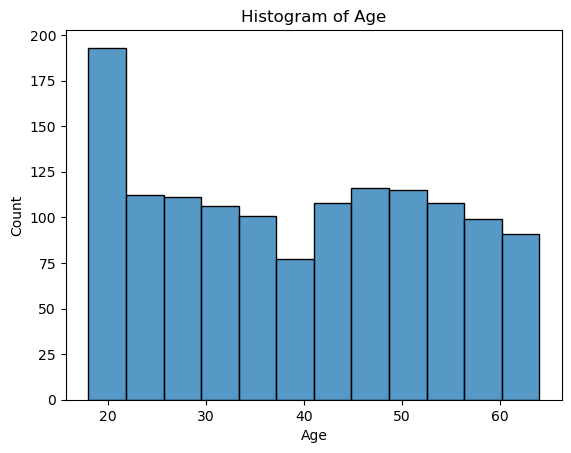

In [17]:
    plt.figure()
    sns.histplot(data=df1, x='age')
    plt.title("Histogram of Age")
    plt.xlabel("Age")
    plt.ylabel ("Count");

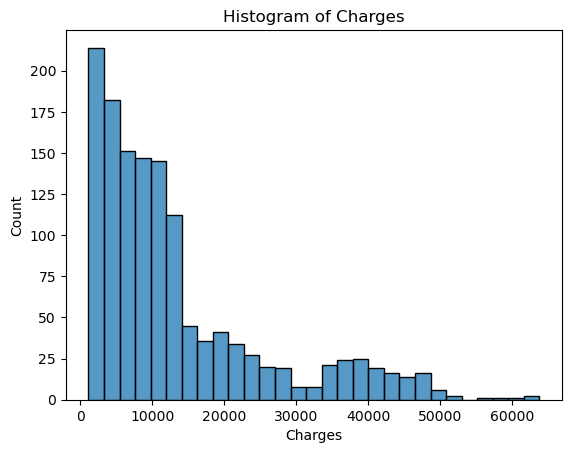

In [18]:
    plt.figure()
    sns.histplot(data=df1, x='charges')
    plt.title("Histogram of Charges")
    plt.xlabel("Charges")
    plt.ylabel ("Count");

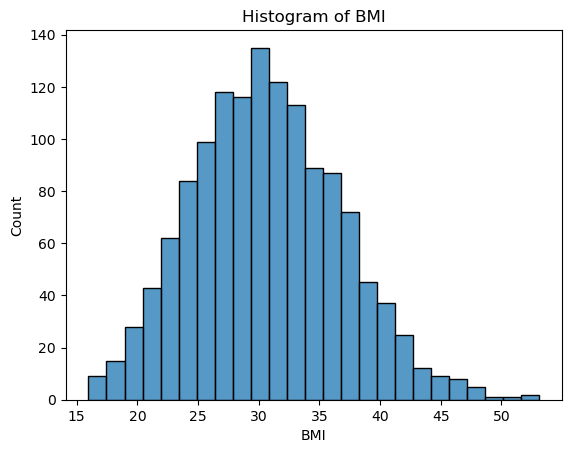

In [19]:
    plt.figure()
    sns.histplot(data=df1, x='bmi')
    plt.title("Histogram of BMI")
    plt.xlabel("BMI")
    plt.ylabel ("Count");

In [20]:
df2 = df1.drop(columns=["Gender", 'Smoker', 'Region', 'children', 'sex', 'smoker', 'region'])

              age       bmi   charges
age      1.000000  0.109344  0.298308
bmi      0.109344  1.000000  0.198401
charges  0.298308  0.198401  1.000000


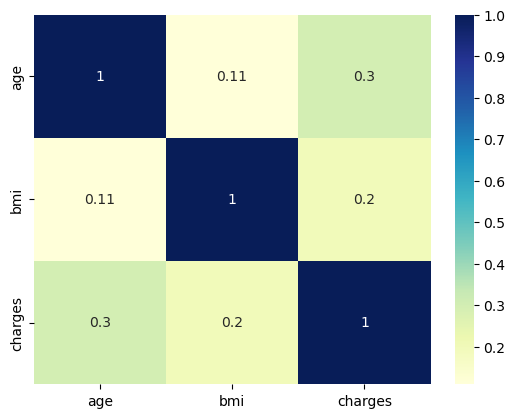

In [21]:
print(df2.corr()) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

In [22]:
df3 = df1.drop(columns=['Gender', 'Smoker', 'sex', 'smoker', 'region'])

               age       bmi  children   charges    Region
age       1.000000  0.107897  0.055813  0.533523 -0.009674
bmi       0.107897  1.000000  0.015643  0.119585  0.246553
children  0.055813  0.015643  1.000000  0.132200 -0.025195
charges   0.533523  0.119585  0.132200  1.000000  0.004446
Region   -0.009674  0.246553 -0.025195  0.004446  1.000000


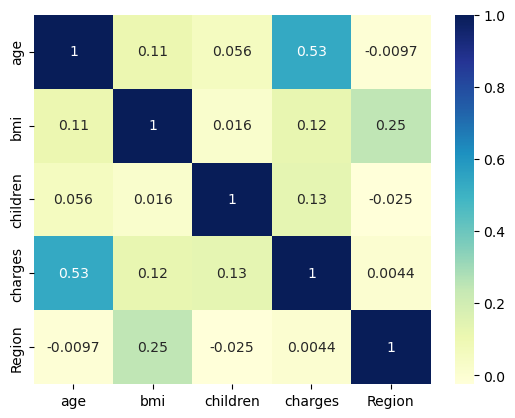

In [23]:
print(df3.corr(method="spearman")) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(df3.corr(method="spearman"), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

In [24]:
df1[['age', 'bmi', 'charges']].corrwith(df1['Smoker'].astype('float'), method=stats.pointbiserialr)

,age,bmi,charges
0,0.025587,-0.003746,-7.872344e-01
1,0.349855,0.891147,1.406722e-282


In [25]:
df1[['age', 'bmi', 'charges']].corrwith(df1['Gender'].astype('float'), method=stats.pointbiserialr)

,age,bmi,charges
0,-0.019814,0.046397,0.058044
1,0.469142,0.089917,0.033821


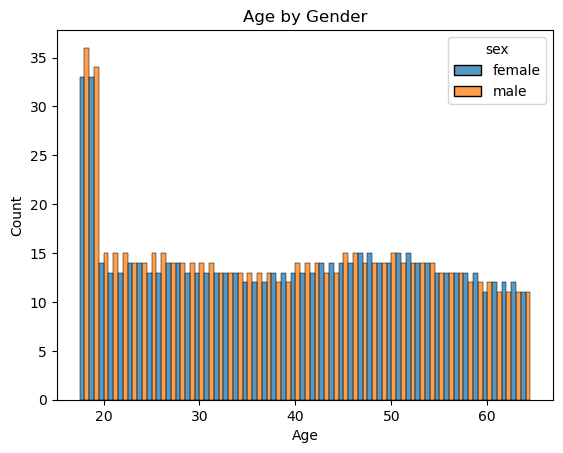

In [26]:
    plt.figure()
    sns.histplot(data=df1, x='age', discrete=True, hue='sex', multiple='dodge')
    plt.title("Age by Gender")
    plt.xlabel("Age")
    plt.ylabel ("Count");

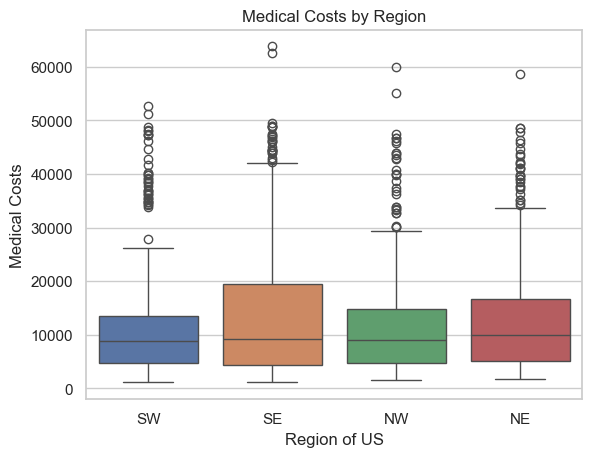

In [76]:
    plt.figure()
    sns.set(style='whitegrid')
    sns.boxplot(x="region",y="charges", data=df1, hue='region')
    plt.title( 'Medical Costs by Region')
    plt.xticks(['southwest','southeast','northwest','northeast'], ['SW','SE','NW','NE'])
    #plt.xlabel(z)
    plt.ylabel ('Medical Costs')
    plt.xlabel ('Region of US')

    #plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    
    
plt.show;

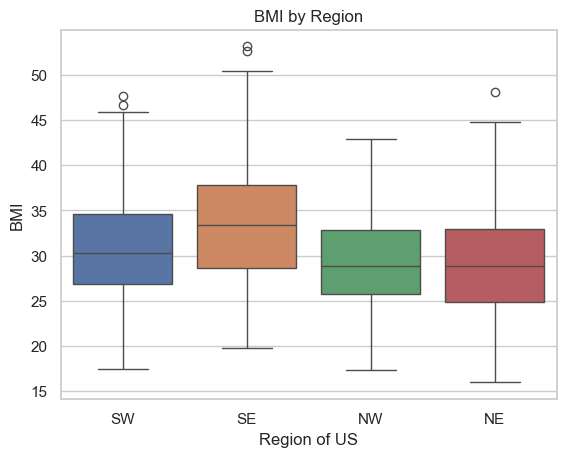

In [77]:
    plt.figure()
    sns.set(style='whitegrid')
    
    
    sns.boxplot(x="region",y="bmi", hue = 'region', data=df1)
    plt.xticks(['southwest','southeast','northwest','northeast'], ['SW','SE','NW','NE'])
    plt.title( 'BMI by Region')
    plt.ylabel ('BMI')
    plt.xlabel ('Region of US')
    #plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    
    
plt.show;

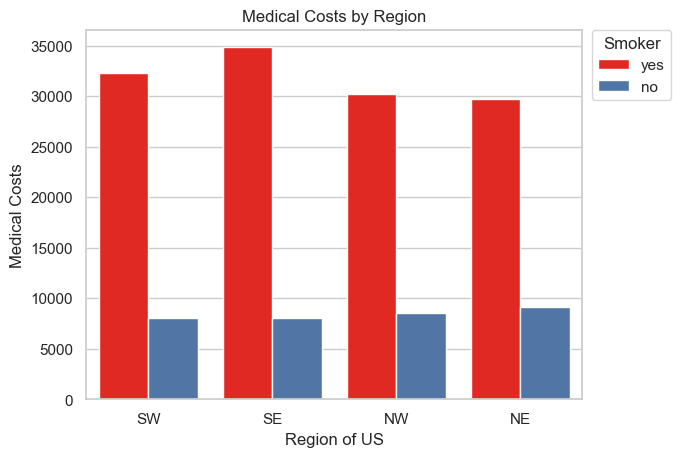

In [78]:
    plt.figure()
    colors = ["#FF0B04", "#4374B3"]
    sns.set_palette(sns.color_palette(colors))
    
    sns.barplot( x='region', y= 'charges', data=df1, hue='smoker', errorbar=('ci', 0))
    plt.title( 'Medical Costs by Region')
    plt.xticks(['southwest','southeast','northwest','northeast'], ['SW','SE','NW','NE'])
    plt.xlabel ('Region of US')
    #plt.xticks([0, 1], ['No', 'Yes'])
    #plt.xlabel(z)
    plt.ylabel ('Medical Costs')
    plt.legend(title='Smoker', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    
    
plt.show;

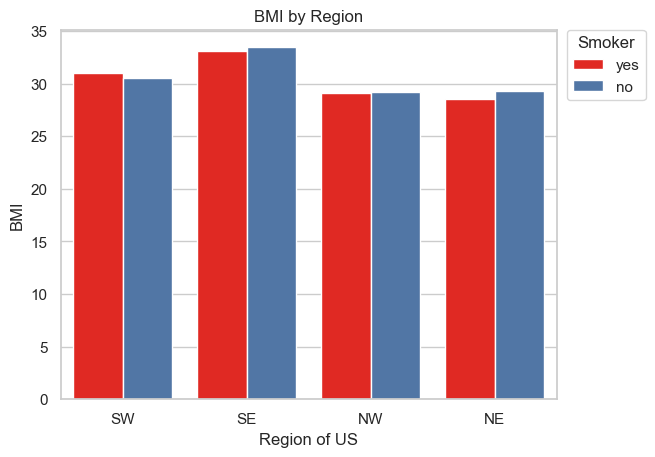

In [79]:
    plt.figure()
    colors = ["#FF0B04", "#4374B3"]
    sns.set_palette(sns.color_palette(colors))
    
    sns.barplot( x='region', y= 'bmi', data=df1, hue='smoker', errorbar=('ci', 0))
    plt.title( 'BMI by Region')
    plt.xticks(['southwest','southeast','northwest','northeast'], ['SW','SE','NW','NE'])
    plt.xlabel ('Region of US')
    #plt.xticks([0, 1], ['No', 'Yes'])
    #plt.xlabel(z)
    plt.ylabel ('BMI')
    plt.legend(title='Smoker', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    
    
plt.show;

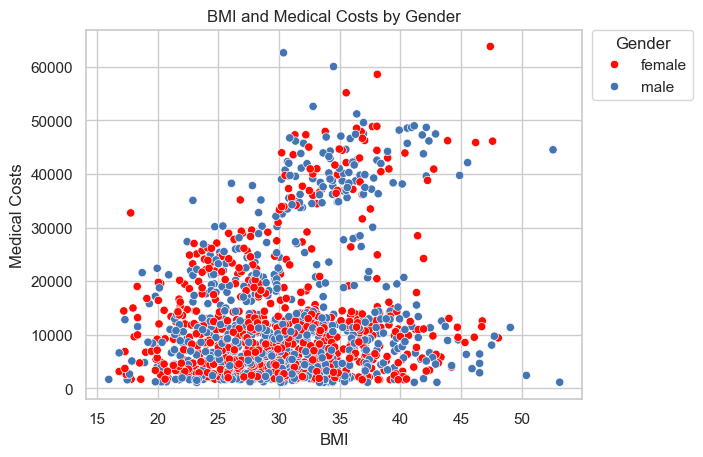

In [80]:

sns.scatterplot(x="bmi",
                    y="charges",
                    data=df1, hue = 'sex')
plt.xlabel ('BMI')
plt.ylabel ('Medical Costs')
plt.title ("BMI and Medical Costs by Gender")
plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


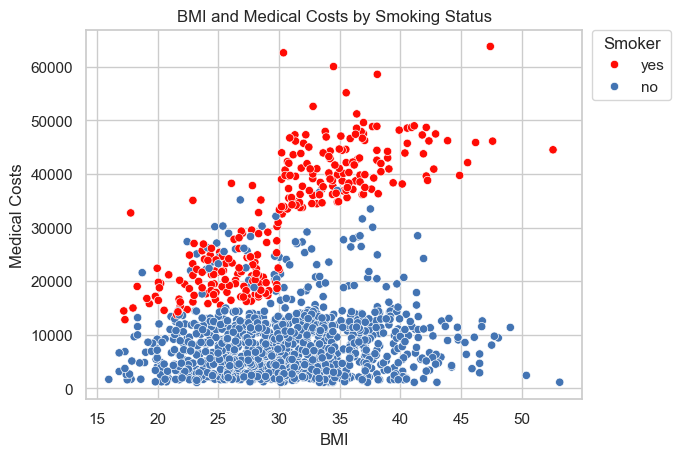

In [82]:
sns.scatterplot(x="bmi",
                    y="charges",
                    data=df1, hue = 'smoker')
plt.xlabel ('BMI')
plt.ylabel ('Medical Costs')
plt.title ("BMI and Medical Costs by Smoking Status")
plt.legend(title='Smoker', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


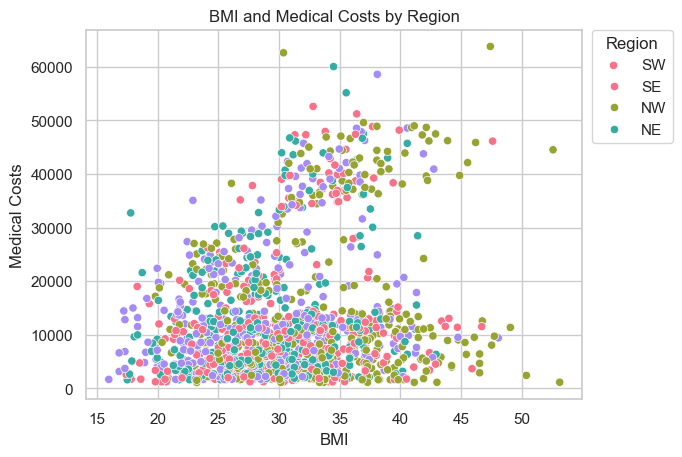

In [83]:
sns.scatterplot(x="bmi",
                    y="charges",
                    data=df1, hue = 'region')

plt.xlabel ('BMI')
plt.ylabel ('Medical Costs')
plt.title ("BMI and Medical Costs by Region")
plt.legend(title='Region', labels = ["SW", "SE", "NW", "NE"], 
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [34]:
df1_1 = df1.select_dtypes(include=['object']) 

In [35]:
catlist = df1_1.columns.tolist()
catlist.append("children")
print(type(catlist), catlist)

<class 'list'> ['sex', 'smoker', 'region', 'children']


In [36]:
df4 = df1.drop(columns = ['Gender', 'Smoker', "Region"])

In [37]:
df4_dummies = pd.get_dummies(df4, prefix_sep='.', columns=catlist)

In [38]:
df4_dummies.head(10)

,age,bmi,charges,sex.female,sex.male,smoker.no,smoker.yes,region.northeast,region.northwest,region.southeast,region.southwest,children.0,children.1,children.2,children.3,children.4,children.5
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True,True,False,False,False,False,False
1,18,33.770,1725.55230,False,True,True,False,False,False,True,False,False,True,False,False,False,False
2,28,33.000,4449.46200,False,True,True,False,False,False,True,False,False,False,False,True,False,False
3,33,22.705,21984.47061,False,True,True,False,False,True,False,False,True,False,False,False,False,False
4,32,28.880,3866.85520,False,True,True,False,False,True,False,False,True,False,False,False,False,False
5,31,25.740,3756.62160,True,False,True,False,False,False,True,False,True,False,False,False,False,False
6,46,33.440,8240.58960,True,False,True,False,False,False,True,False,False,True,False,False,False,False
7,37,27.740,7281.50560,True,False,True,False,False,True,False,False,False,False,False,True,False,False
8,37,29.830,6406.41070,False,True,True,False,True,False,False,False,False,False,True,False,False,False
9,60,25.840,28923.13692,True,False,True,False,False,True,False,False,True,False,False,False,False,False


In [39]:
# target 
target = df4_dummies[['charges']]


# data 
features = df4_dummies.drop(columns = ['charges'])

In [40]:
target.shape

(1337, 1)

In [41]:
features.shape

(1337, 16)

In [42]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [43]:
# running linear regression to report the R2-value and RMSE on the test set.
regressor = LinearRegression()

In [44]:
regressor.fit(features_train, target_train)

LinearRegression()

In [45]:
chg_predict = regressor.predict(features_test)

In [46]:
r2_score(target_test, chg_predict)

0.7541814960286368

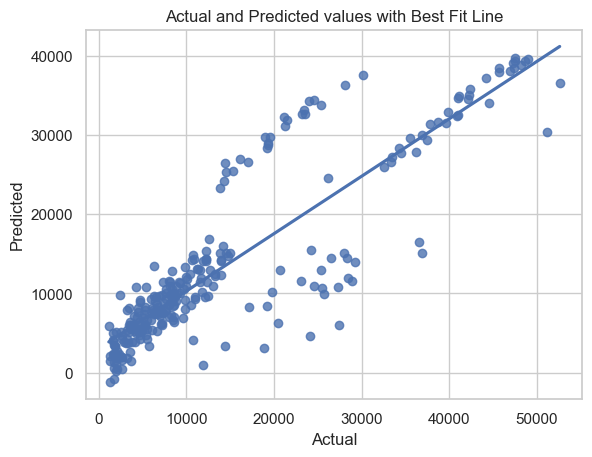

In [85]:
sns.regplot(x=target_test, y=chg_predict, ci=None, color='b')
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title ("Actual and Predicted values with Best Fit Line");

In [48]:
# root mean squared error - same code as mean_squared_error except with squared set to false
# A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly

mean_squared_error(target_test, chg_predict, squared=False)

6430.7029535329375

In [49]:
# running pca
features_trans = StandardScaler().fit_transform(features_train)

In [50]:
pca = PCA(n_components = .90, whiten=True)
pca

PCA(n_components=0.9, whiten=True)

In [51]:
features_pcaf = pca.fit_transform(features_trans)

In [52]:
print("Original number of features:", features_trans.shape[1])
print("Reduced number of features:", features_pcaf.shape[1])

Original number of features: 16
Reduced number of features: 11


In [53]:
featurest = StandardScaler().fit_transform(features_test)

In [54]:
# transforming but not fitting 
features_pcatf = pca.transform(featurest)

In [55]:
# redoing the regression 
regressor.fit(features_pcaf, target_train)

LinearRegression()

In [56]:
chg_predict_pca = regressor.predict(features_pcatf)

In [57]:
mean_squared_error(target_test, chg_predict_pca, squared=False)

6564.555496441615

In [58]:
# r-squared 
r2_score(target_test, chg_predict_pca)

0.7438417655008649

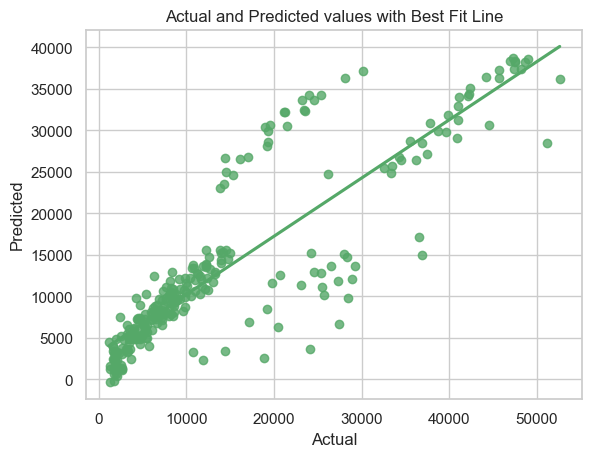

In [86]:
sns.regplot(x=target_test, y=chg_predict_pca, ci=None, color='g')
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title ("Actual and Predicted values with Best Fit Line");

In [60]:
# Create a Random Forest Classifier
rfr = RandomForestRegressor(random_state=13)

In [61]:
rfr.fit(features_train, target_train.values.ravel())

RandomForestRegressor(random_state=13)

In [62]:
y_predrf = rfr.predict(features_test)

In [63]:
mean_squared_error(y_predrf, target_test, squared=False)

5291.762575495843

In [64]:
r2_score(y_predrf, target_test)

0.800439603672009

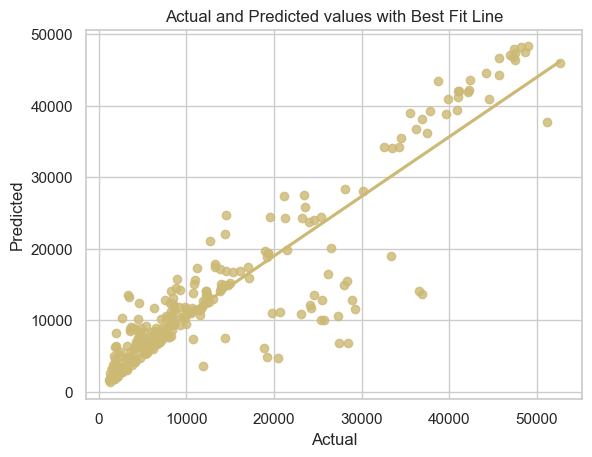

In [87]:
sns.regplot(x=target_test, y=y_predrf, ci=None, color='y')
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title ("Actual and Predicted values with Best Fit Line");

In [66]:
# hyper parameter tuning 
param_grid = {
    'n_estimators': [100, 200, 300], # number of decision trees
    'max_depth': [10, 20, 30],  # depth of the specific trees
    'min_samples_split': [2, 5, 10], # the number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4] # min at the leaf node 
}

In [67]:
rfr_cv = GridSearchCV(estimator = rfr, param_grid = param_grid, cv= 3, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [68]:
rfr_cv.fit(features_train, target_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [69]:
y_predrf_cv = rfr_cv.predict(features_test)

In [70]:
mean_squared_error(y_predrf_cv, target_test, squared=False)

5072.03737622911

In [71]:
r2_score(y_predrf_cv, target_test)

0.8172494947296728

In [72]:
# creating a df of the model results 
dv = rfr_cv.fit(features_train, target_train.values.ravel())

In [73]:
# what params were the best from the hypertuning 
est_params=dv.best_params_ 
est_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [74]:
# looking the each feature and how strong of a contributor each feature is
myvars = pd.Series(dv.best_estimator_.feature_importances_, index=features_train.columns)
myvars.sort_values(ascending=False)
print (myvars.head(16))

age                 0.118927
bmi                 0.177876
sex.female          0.001137
sex.male            0.001148
smoker.no           0.352501
smoker.yes          0.327422
region.northeast    0.003279
region.northwest    0.001586
region.southeast    0.001685
region.southwest    0.001149
children.0          0.005760
children.1          0.003108
children.2          0.001995
children.3          0.001350
children.4          0.001066
children.5          0.000010
dtype: float64


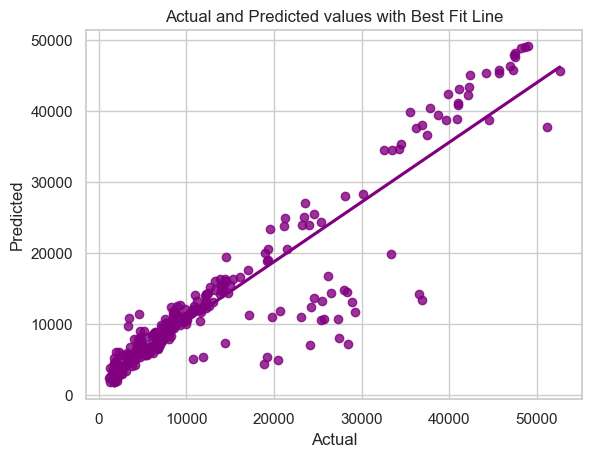

In [88]:
sns.regplot(x=target_test, y=y_predrf_cv, ci=None, color='purple')
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title ("Actual and Predicted values with Best Fit Line");